In [24]:
#importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
sale=pd.read_csv("E:\\ML\\supermarket_sales - Sheet1.csv")


In [23]:
#Sample of Data
sale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
sale.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [25]:
#Data Types Of Given Data
sale.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [31]:
#Changing the format of date in right form
sale['Date']=pd.to_datetime(sale['Date'])



In [32]:
sale['Date'].dtype

dtype('<M8[ns]')

In [22]:
type(sale['Date'])

pandas.core.series.Series

In [34]:
sale['Date'] = pd.to_datetime(sale['Date'])

In [37]:
sale['Day']=(sale['Date']).dt.day
sale['Month']=(sale['Date']).dt.month
sale['Year']=(sale['Date']).dt.year

In [39]:
sale['Time'] = pd.to_datetime(sale['Time'])

In [40]:
sale['Time']

0     2025-02-01 13:08:00
1     2025-02-01 10:29:00
2     2025-02-01 13:23:00
3     2025-02-01 20:33:00
4     2025-02-01 10:37:00
              ...        
995   2025-02-01 13:46:00
996   2025-02-01 17:16:00
997   2025-02-01 13:22:00
998   2025-02-01 15:33:00
999   2025-02-01 13:28:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [41]:
sale['Hour']=(sale['Time']).dt.hour

In [43]:
#Unique Hours of Sale
sale['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [44]:
sale['Hour'].nunique()

11

In [45]:
#Summary Statistics
sale.describe()


,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2025-02-01 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2025-02-01 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2025-02-01 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2025-02-01 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2025-02-01 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2025-02-01 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857


In [46]:
sale.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


In [54]:
categorical_columns=[x for x in sale.columns if sale[x].dtype=="object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [55]:
print("# unique values in Branch: {0}".format(len(sale['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sale['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sale['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sale['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sale['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sale['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


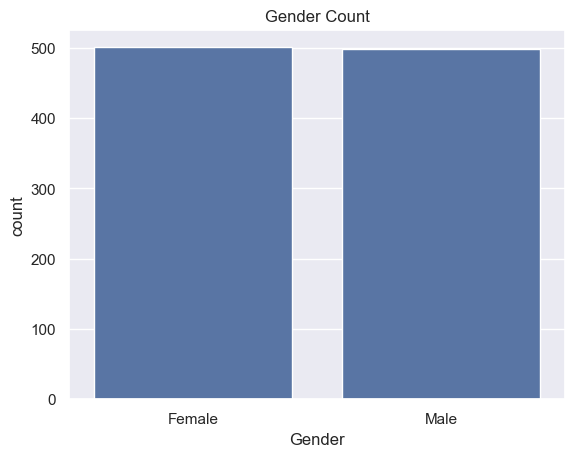

In [61]:
sb.set(style='darkgrid')
genderCount=sb.countplot(x='Gender', data= sale).set_title("Gender Count")

Text(0.5, 1.0, 'Branch Rating')

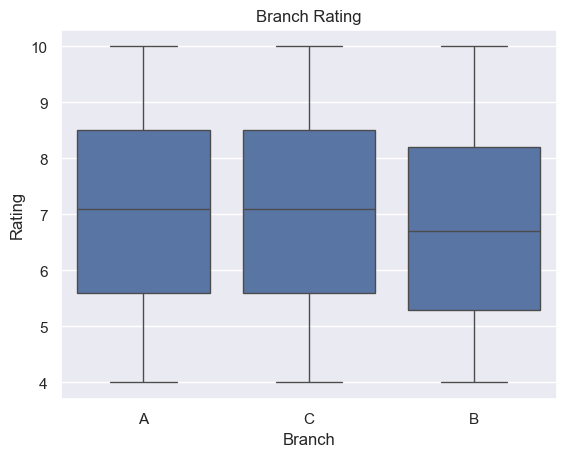

In [62]:
sb.boxplot(x='Branch',y='Rating',data=sale).set_title("Branch Rating")

Text(0.5, 1.0, 'Hourly Product Sales')

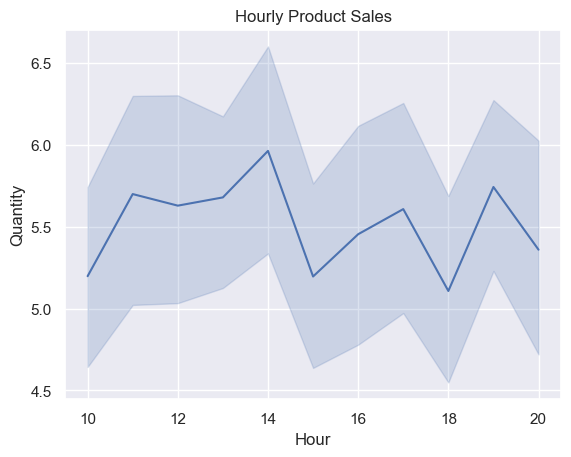

In [65]:
sb.lineplot(x="Hour",y='Quantity',data=sale).set_title("Hourly Product Sales")

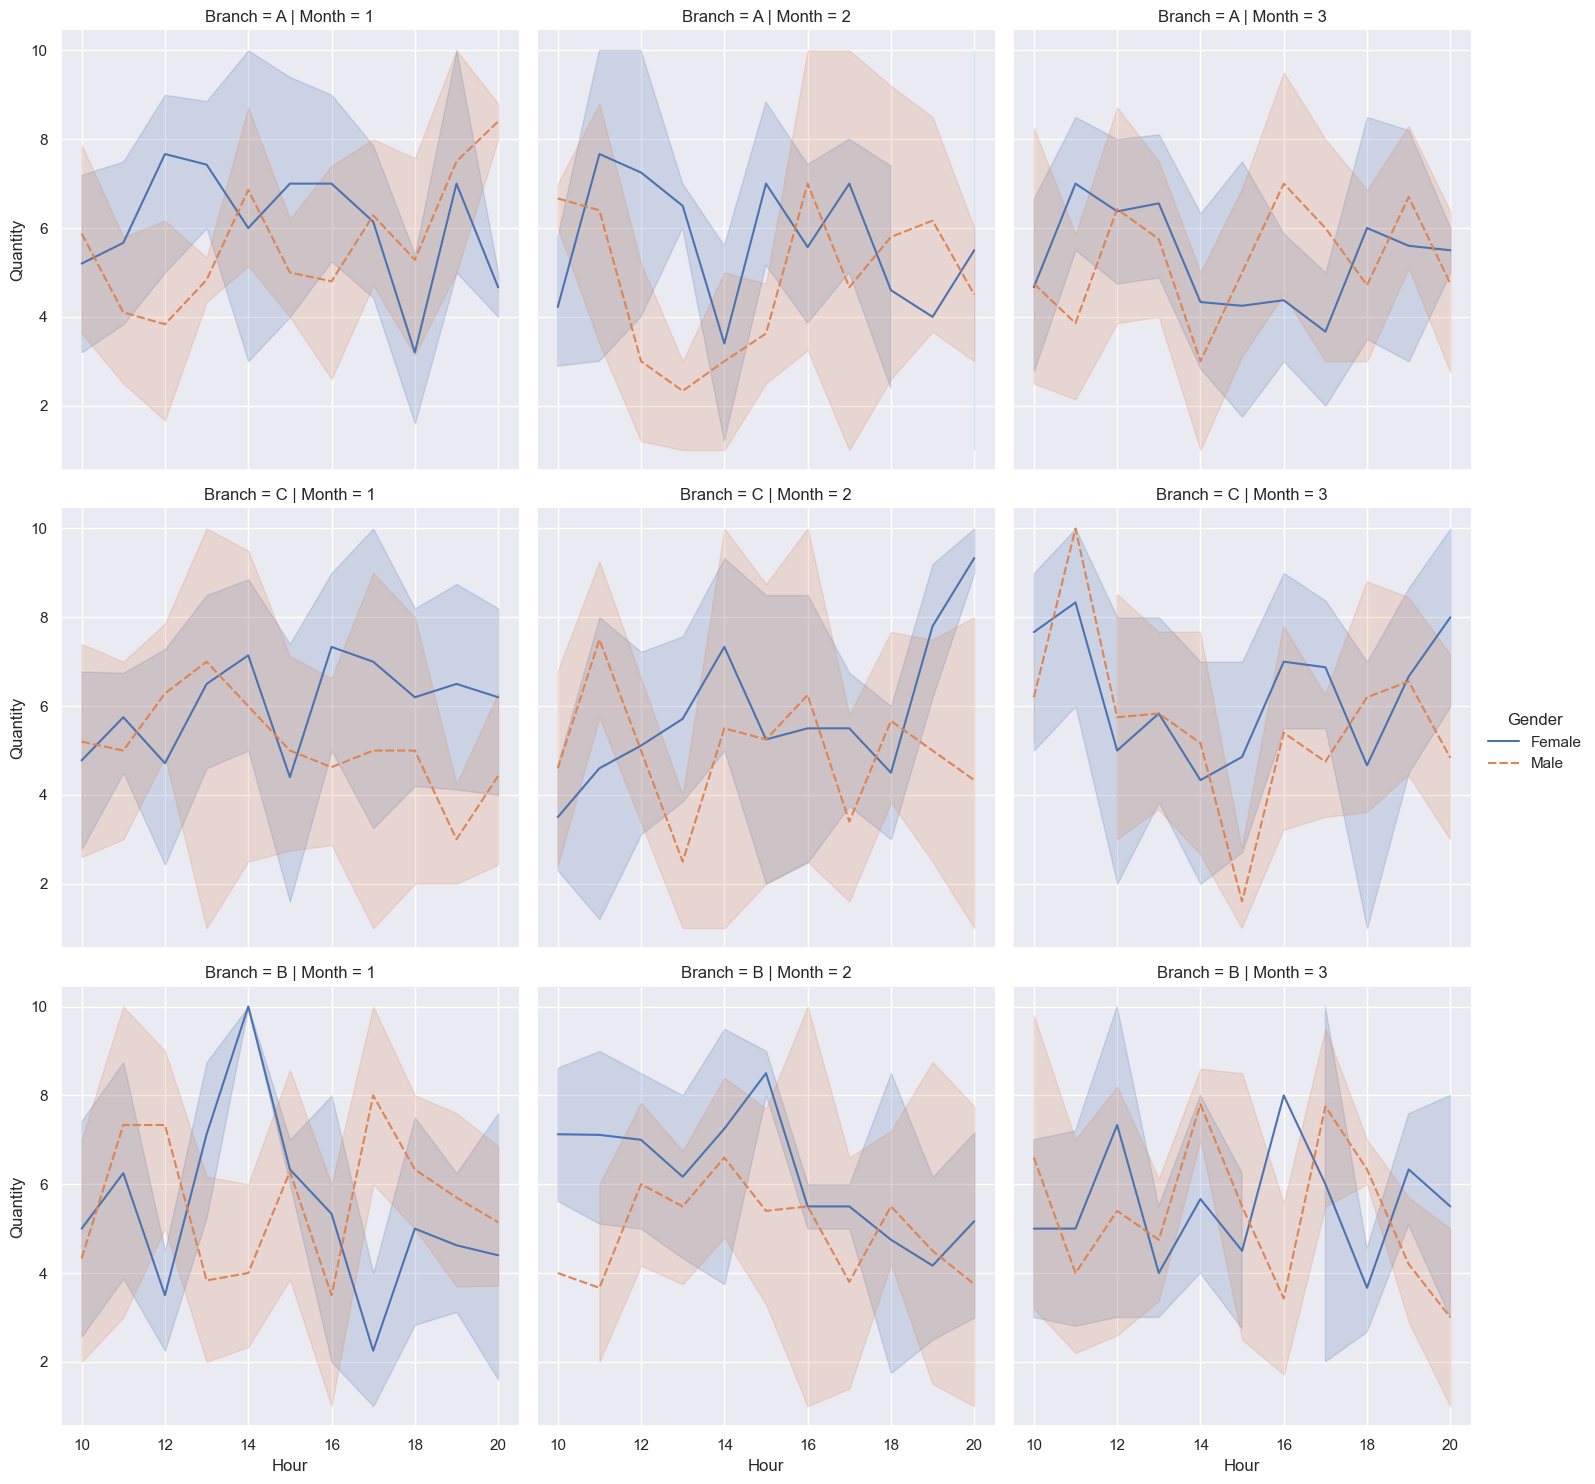

In [69]:
genderCount = sb.relplot(x="Hour",y = 'Quantity',col= 'Month',row= 'Branch',kind="line",hue="Gender",style="Gender", data =sale)

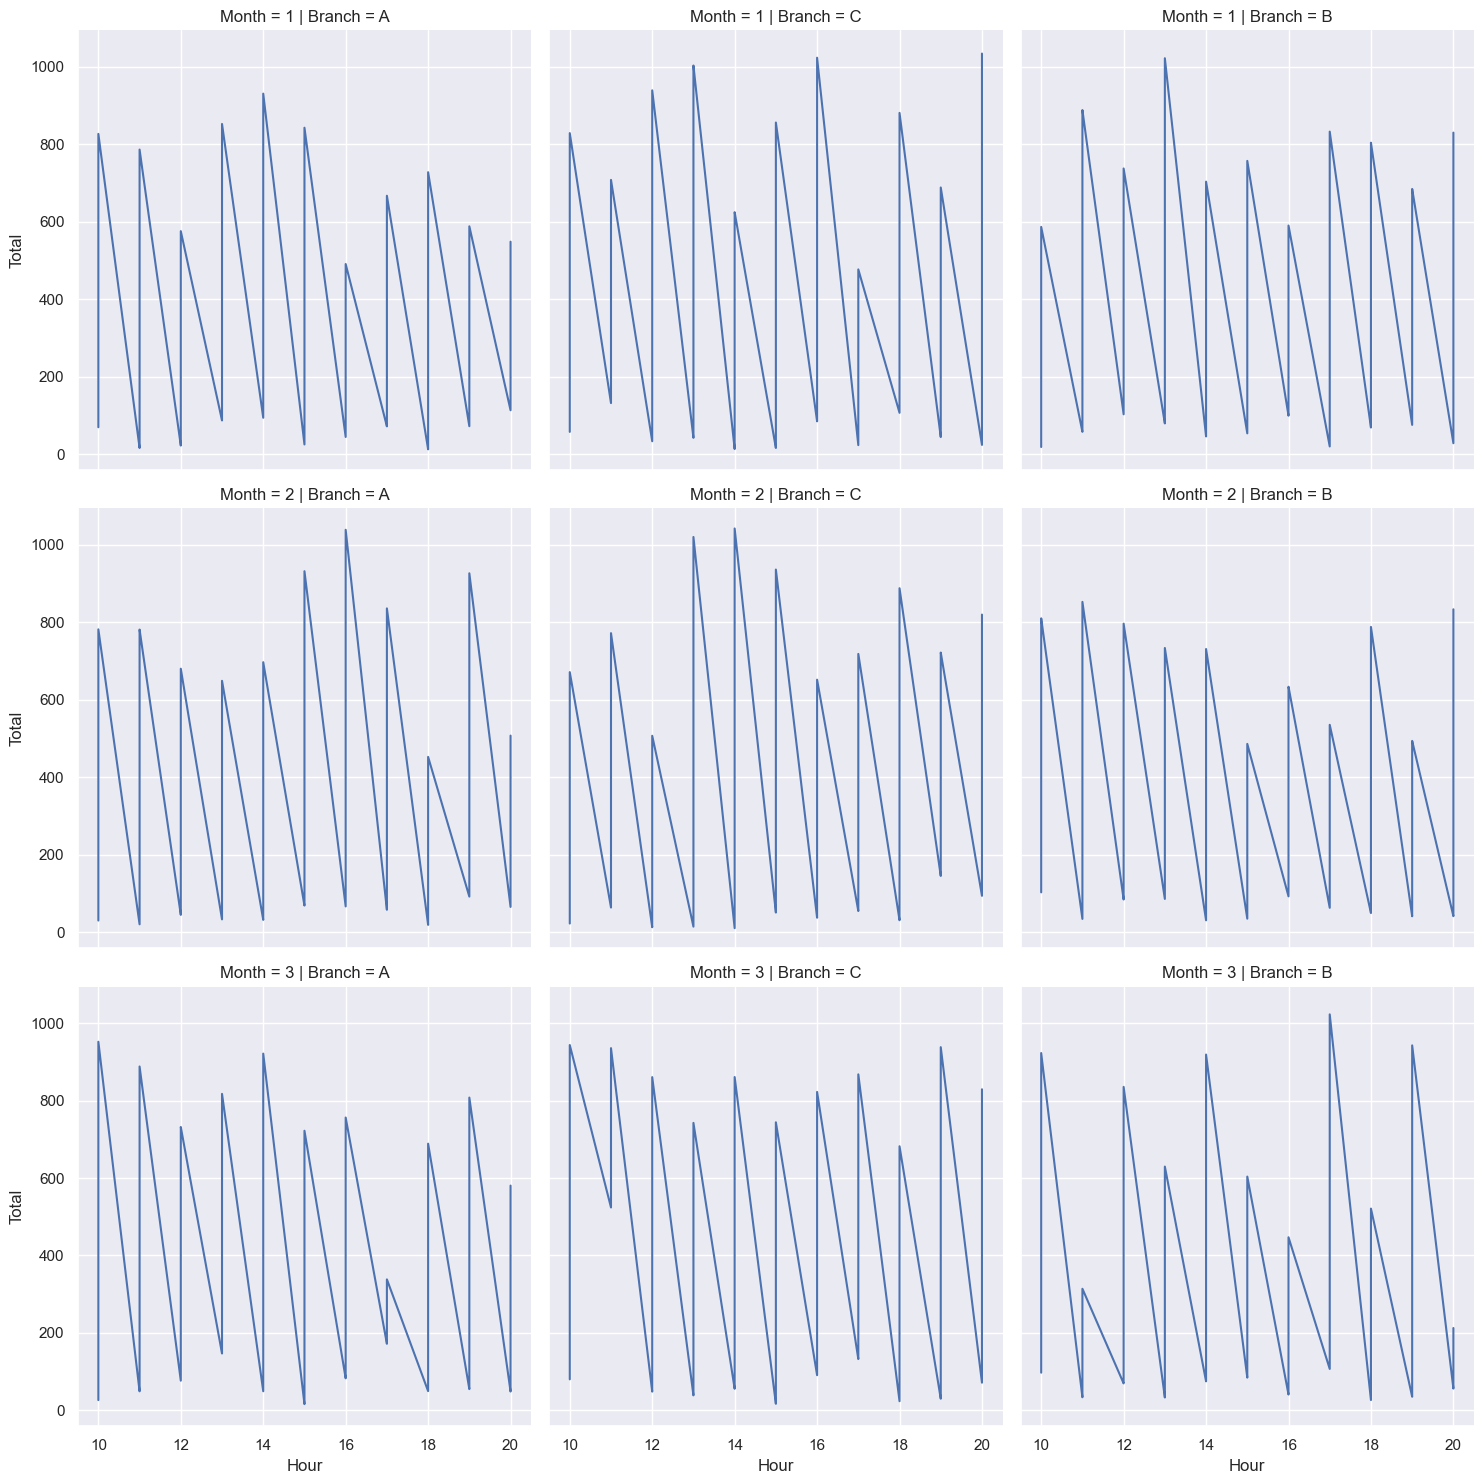

In [74]:
genderCount=sb.relplot(x='Hour',y='Total',row='Month',col='Branch',kind='line',estimator=None,data=sale)

In [76]:
sale['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

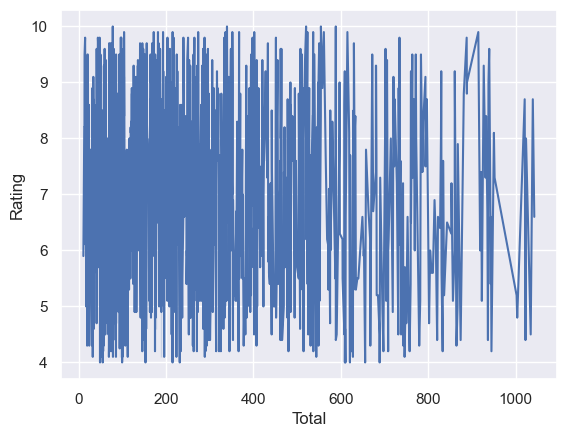

In [80]:
ageDSpend=sb.lineplot(x='Total',y='Rating',data=sale).set_title("")

<Axes: xlabel='Quantity', ylabel='Product line'>

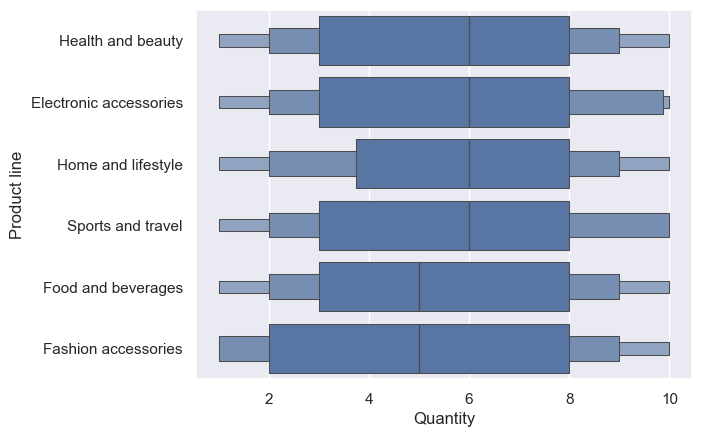

In [86]:
#Product Analysis
sb.boxenplot(y="Product line", x="Quantity",data=sale)

<Axes: xlabel='count', ylabel='Product line'>

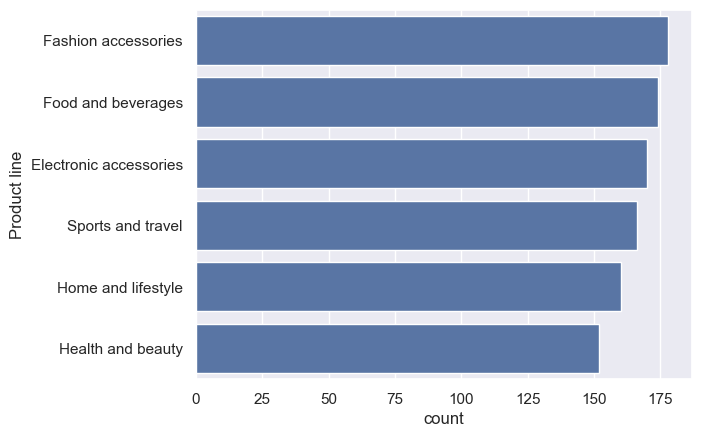

In [88]:
sb.countplot(y = 'Product line', data=sale, order = sale['Product line'].value_counts().index )

<Axes: xlabel='Total', ylabel='Product line'>

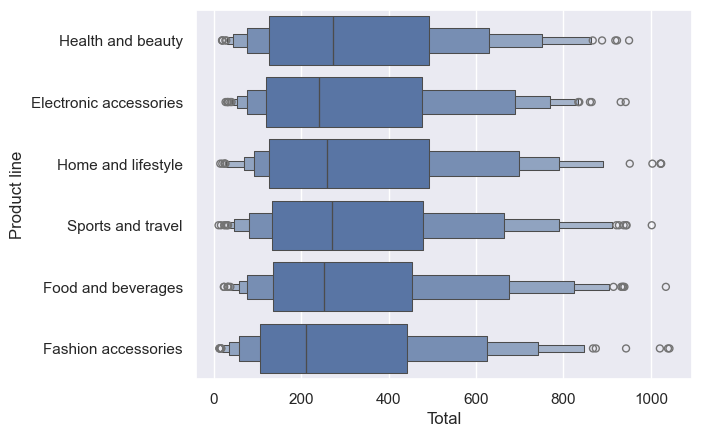

In [89]:
sb.boxenplot(y = 'Product line', x = 'Total', data=sale )

<Axes: xlabel='Total', ylabel='Product line'>

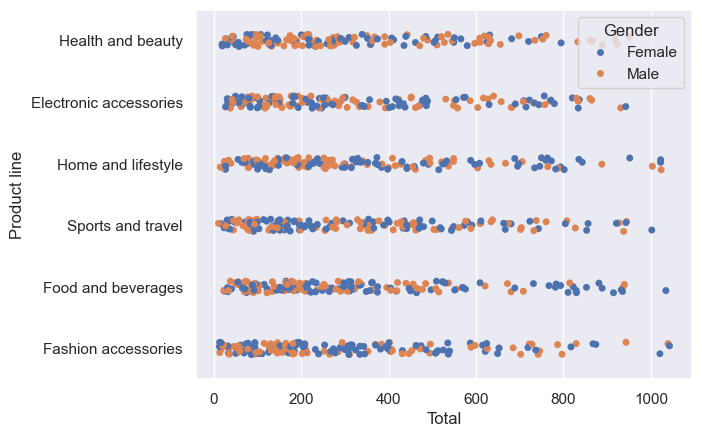

In [90]:
sb.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sale )

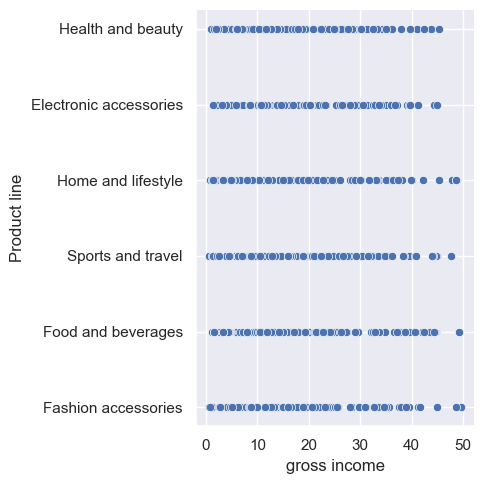

In [91]:
sb.relplot(y = 'Product line', x = 'gross income', data=sale )

<Axes: xlabel='Rating', ylabel='Product line'>

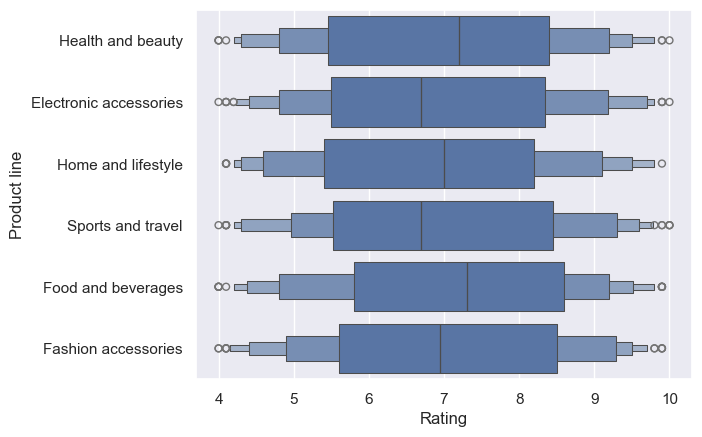

In [92]:
sb.boxenplot(y = 'Product line', x = 'Rating', data=sale )

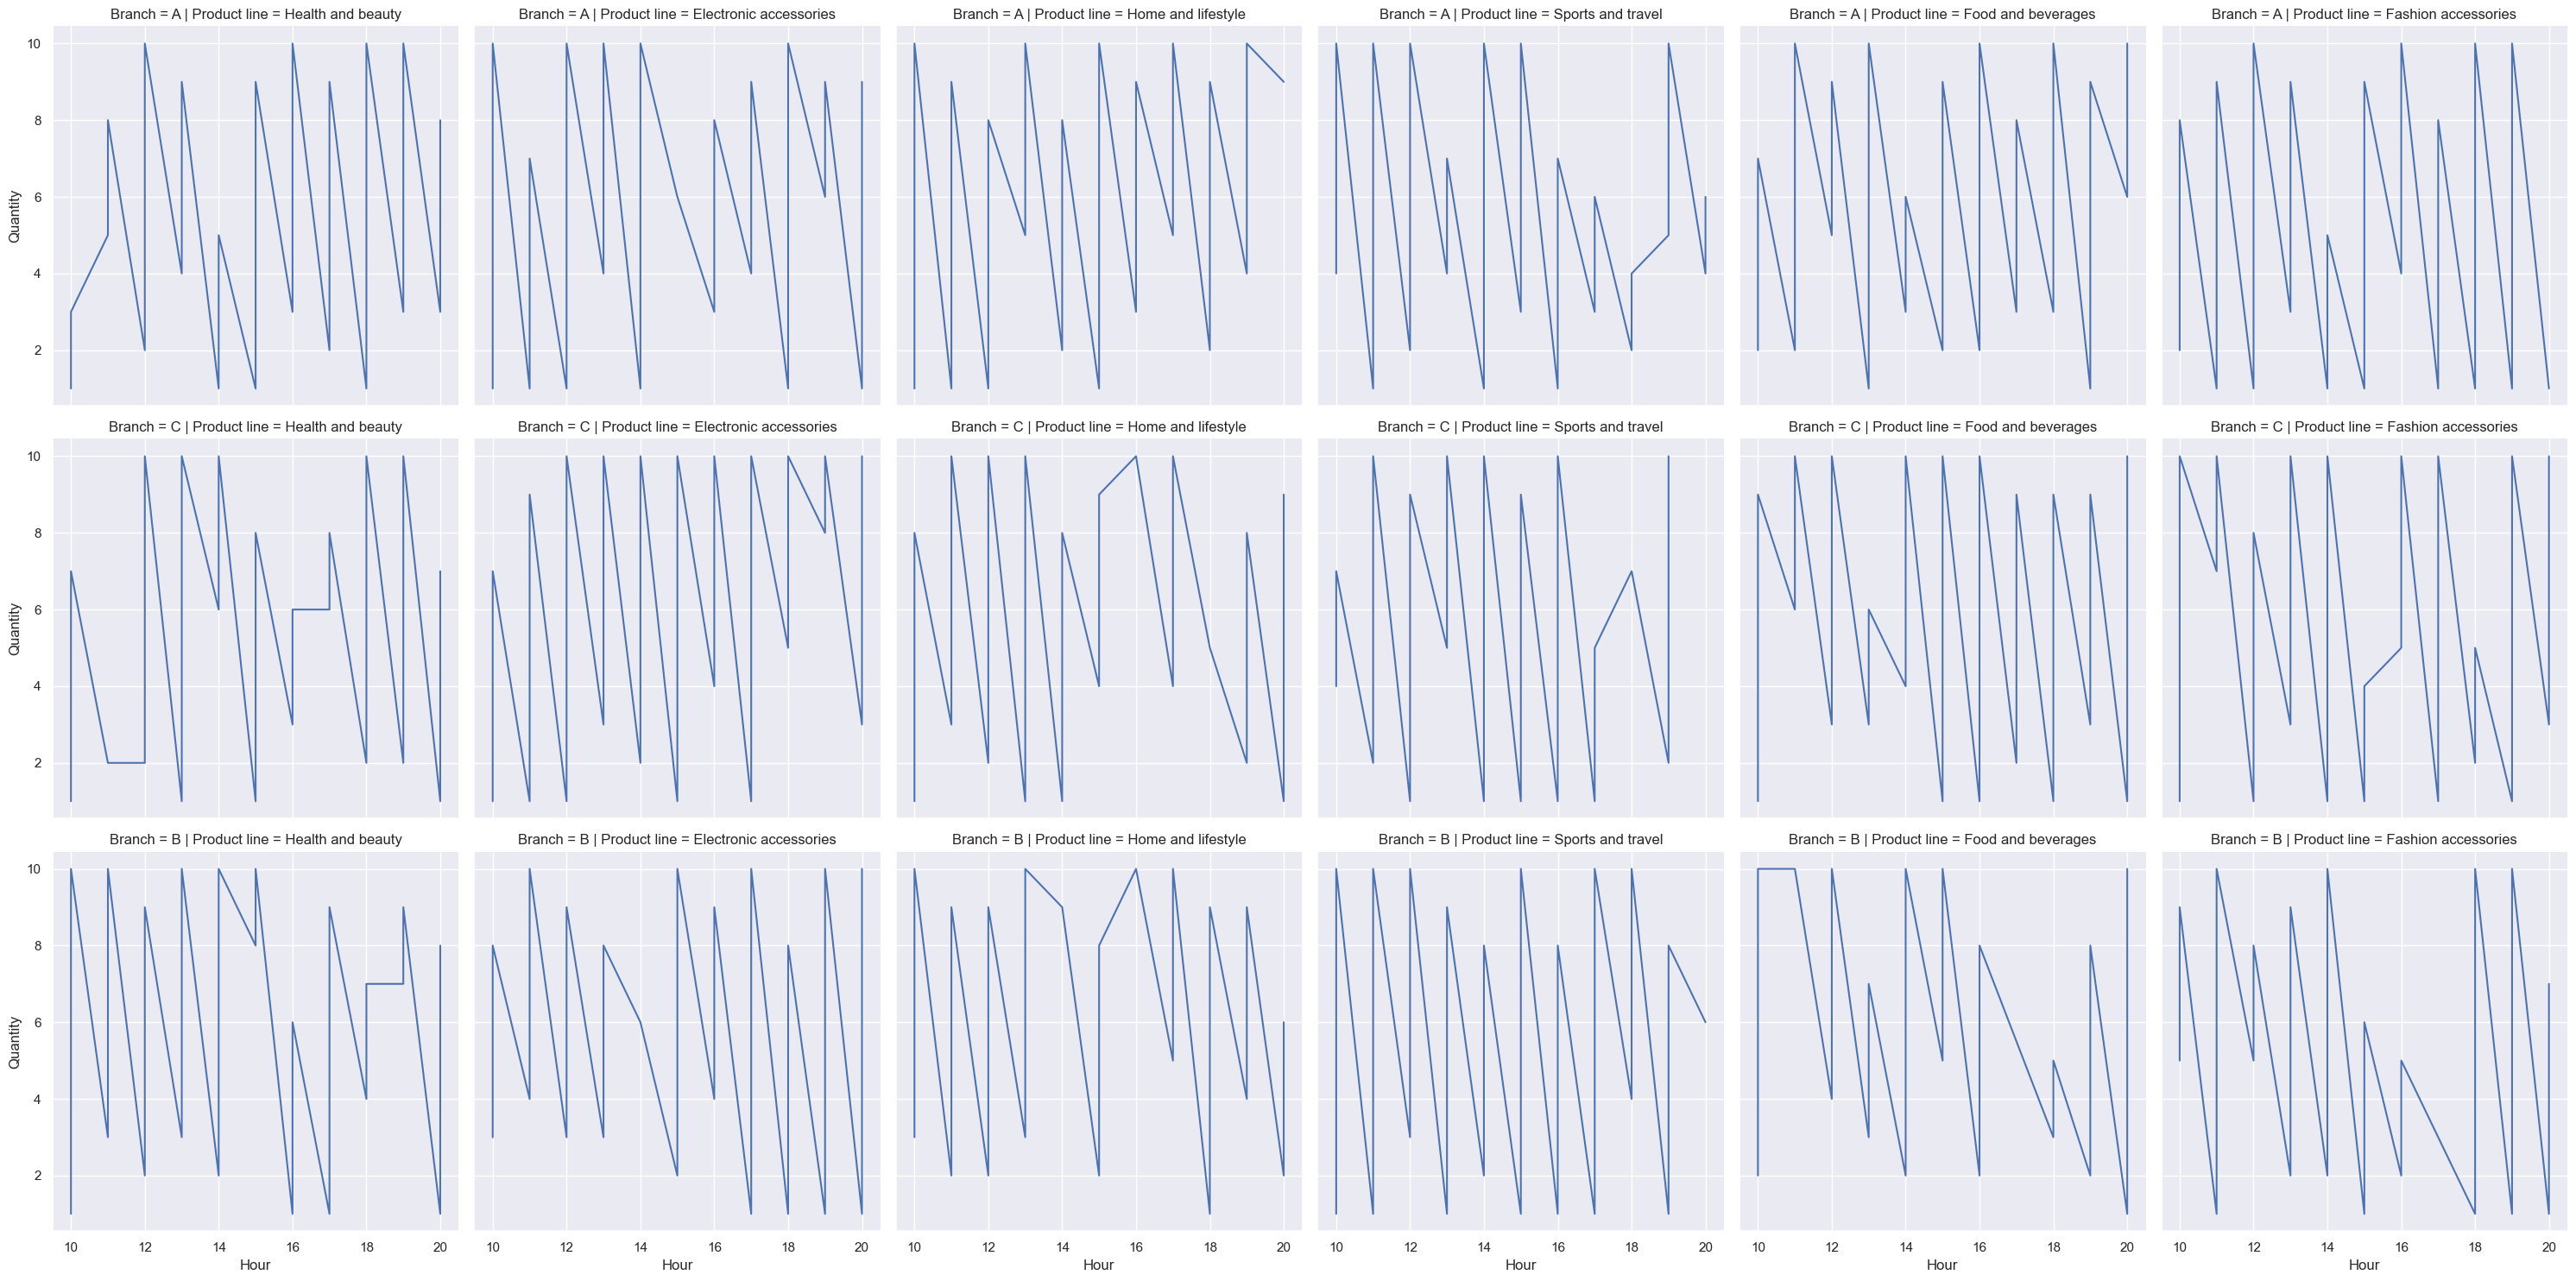

In [93]:
productCount  = sb.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sale)

Text(0.5, 1.0, 'Payment Channel')

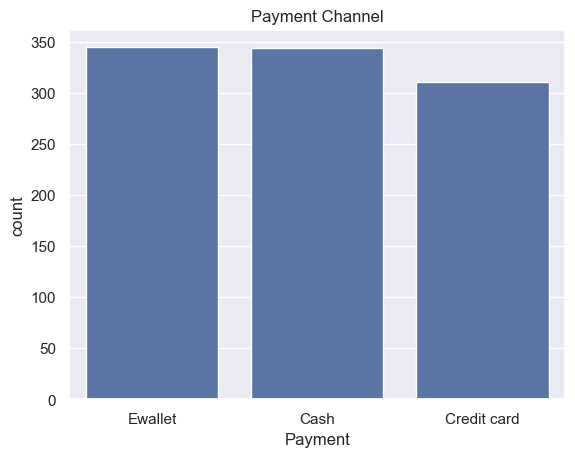

In [94]:
 sb.countplot(x="Payment", data =sale).set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

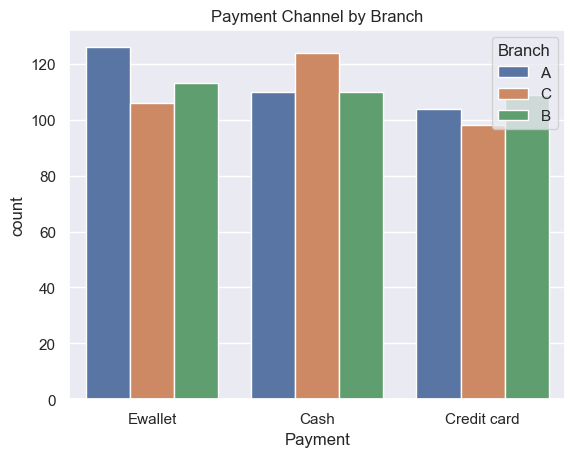

In [95]:
 sb.countplot(x="Payment", hue = "Branch", data =sale).set_title("Payment Channel by Branch") 


In [96]:
sale['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

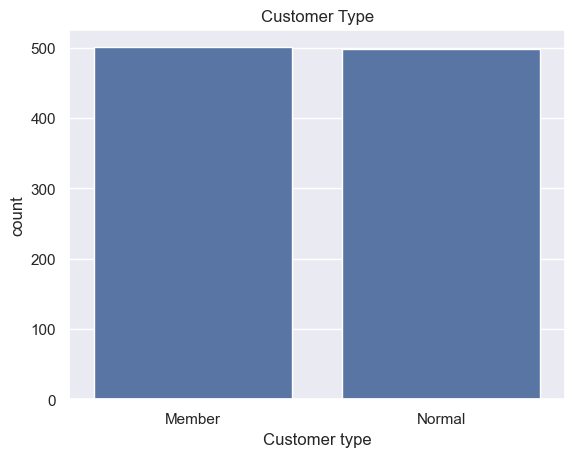

In [97]:
 sb.countplot(x="Customer type", data =sale).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

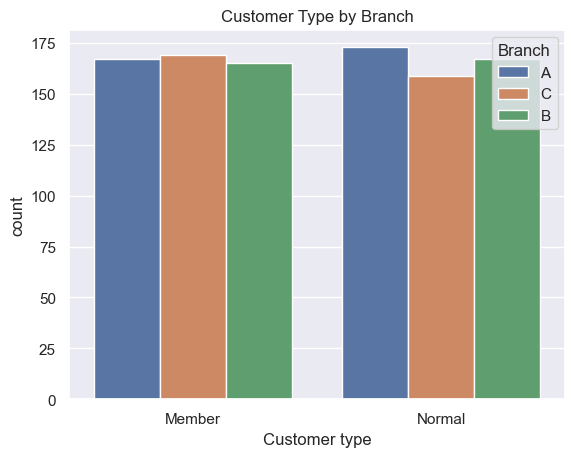

In [98]:
sb.countplot(x="Customer type", hue = "Branch", data =sale).set_title("Customer Type by Branch")

In [99]:
sale.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

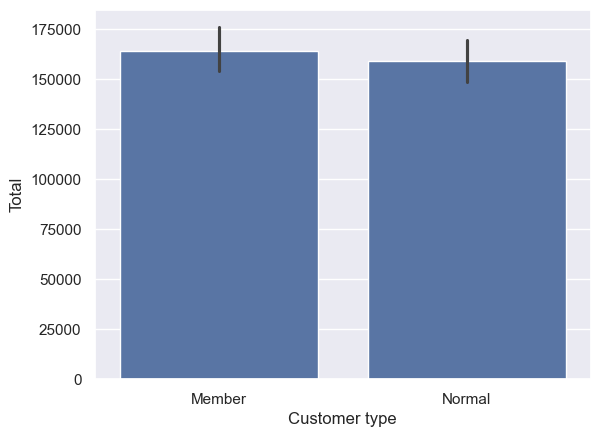

In [100]:
sb.barplot(x="Customer type", y="Total", estimator = sum, data=sale)

Text(0.5, 1.0, 'Customer Type')

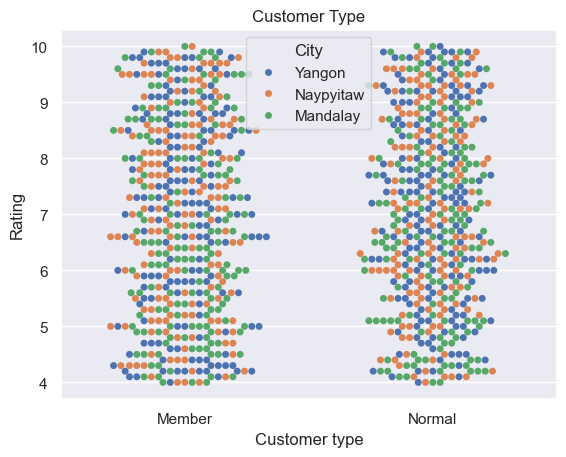

In [101]:
 sb.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sale).set_title("Customer Type") 

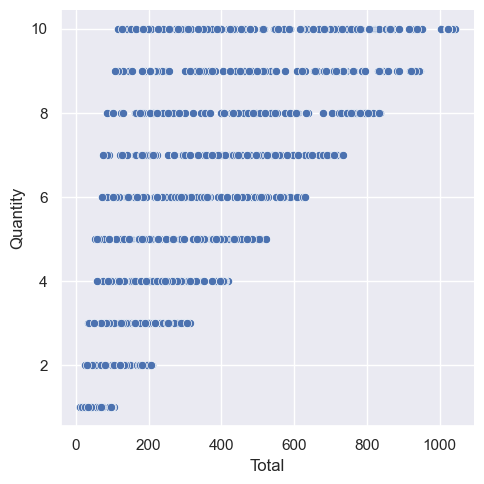

In [103]:
 sb.relplot(x="Total",  y = "Quantity", data =sale)